In [1]:
pip install metapub

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.


In [3]:
!export NCBI_API_KEY='d85d284164d8d262c787b66fc77b1deff608'

In [4]:
from metapub import PubMedFetcher
import pandas as pd
fetch = PubMedFetcher()

2022-11-26 15:09:30 Isabels-MacBook-Pro-2.local metapub.config[11122] WARNING NCBI_API_KEY was not set.


In [5]:
PubMedFetcher().__dict__

{'method': 'eutils',
 '_cache_path': 'default/pubmedfetcher.db',
 'qs': <eutils._internal.queryservice.QueryService at 0x7ff333b55520>,
 'article_by_pmid': <bound method PubMedFetcher._eutils_article_by_pmid of <metapub.pubmedfetcher.PubMedFetcher object at 0x7ff333b556d0>>,
 'article_by_pmcid': <bound method PubMedFetcher._eutils_article_by_pmcid of <metapub.pubmedfetcher.PubMedFetcher object at 0x7ff333b556d0>>,
 'article_by_doi': <bound method PubMedFetcher._eutils_article_by_doi of <metapub.pubmedfetcher.PubMedFetcher object at 0x7ff333b556d0>>,
 'pmids_for_query': <bound method PubMedFetcher._eutils_pmids_for_query of <metapub.pubmedfetcher.PubMedFetcher object at 0x7ff333b556d0>>}

In [6]:
!export NCBI_API_KEY='d85d284164d8d262c787b66fc77b1deff608'

In [7]:
# get the first 2800 pmids matching "hereditary angioedema" keyword search
pmids = fetch.pmids_for_query('hereditary angioedema', retmax=3250)

# get title for each article:
titles = {}

# get abstract for each article:
abstracts = {}

# get year for each article:
years = {}

print(len(pmids), pmids[:2])

3 ['36422280', '36418101']


In [ ]:
batch1 = pmids[:3250]
print(batch1[:10])

for p, pmid in enumerate(batch1):
    try:
        article = fetch.article_by_pmid(pmid)
        #abstracts[pmid] = article.abstract
        #titles[pmid] = article.title
        #years[pmid] = article.year
        if p % 10 == 0:
            print(f"{p} articles fetched")
        time.sleep(0.1)
    except:
        print(p, pmid)

['36422280', '36418101', '36418094', '36417927', '36411000', '36409609', '36408587', '36394625', '36385678', '36381841']
0 articles fetched
10 articles fetched
20 articles fetched
30 articles fetched
40 articles fetched
50 articles fetched
60 articles fetched
70 articles fetched
80 articles fetched
90 articles fetched
100 articles fetched
110 articles fetched
120 articles fetched
130 articles fetched
140 articles fetched
150 articles fetched
160 articles fetched
170 articles fetched
180 articles fetched
190 articles fetched
200 articles fetched
210 articles fetched
220 articles fetched
230 articles fetched
240 articles fetched
250 articles fetched
260 articles fetched
270 articles fetched
280 articles fetched
290 articles fetched
300 articles fetched
310 articles fetched
320 articles fetched
330 articles fetched
340 articles fetched
350 articles fetched
360 articles fetched
370 articles fetched
380 articles fetched
390 articles fetched
400 articles fetched
410 articles fetched
420 arti

In [46]:
print(len(abstracts))

309
254


In [50]:
Title = pd.DataFrame(list(titles.items()),columns = ['pmid','Title'])
Abstract = pd.DataFrame(list(abstracts.items()),columns = ['pmid','Abstract'])
Year = pd.DataFrame(list(years.items()),columns = ['pmid','Year'])
Year


,pmid,Year
0,36422280,2022
1,36418101,2022
2,36418094,2022
3,36417927,2022
4,36411000,2023
...,...,...
654,30952698,2019
655,30924700,2019
656,30923640,2019
657,30922680,2019


In [16]:
# https://www.kaggle.com/code/binitagiri/extract-data-from-pubmed-using-python
data_frames = [Title,Abstract,Year]
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['pmid'],
                                            how='outer'), data_frames)
df_merged

,pmid,Title,Abstract,Year
0,36422280,Altered Urinary Metabolomics in Hereditary Ang...,Hereditary angioedema (HAE) is a rare and pote...,2022
1,36418101,A Case of Duodenal Edema-related Undiagnosed H...,None,2022
2,36418094,A Missense Mutation of the Plasminogen Gene in...,Hereditary angioedema (HAE) is a life-threaten...,2022
3,36417927,Hereditary Angioedema: The Clinical Picture of...,"Hereditary angioedema is a rare, genetic disor...",2022
4,36411000,Hereditary Angioedema During Pregnancy: Consid...,"In recent years, hereditary angioedema (HAE) m...",2023
5,36409609,Anti-HK antibody inhibits the plasma contact s...,A dysregulated plasma contact system is involv...,2022
6,36408587,A review of berotralstat for the treatment of ...,INTRODUCTION: Hereditary angioedema due to C1-...,2022
7,36394625,Hereditary angioedema: A rare but serious and ...,Hereditary angioedema is a rare and commonly m...,2022
8,36385678,Interplay between C1-inhibitor and group IIA s...,High levels of human group IIA secreted phosph...,2022
9,36381841,A Rare Case Report of Sitagliptin-Induced Angi...,"Sitagliptin, a dipeptidyl peptidase-4 inhibito...",2022


In [18]:
# adapted from: https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string
def clean_txt(sentence):
    # get rid of all the symbols that aren't relevant to the movie review
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}#x[0-9a-f]{1,6});')
    clean_sen = re.sub(cleanr, '', sentence)
    return clean_sen

In [19]:
X = []
sentences = list(df_merged['Abstract'])

# clean each of the Abstracts in the dataframe
for sen in sentences: 
    x = clean_txt(str(sen))
    X.append(x)
    
df_merged['clean'] = X
df_merged

,pmid,Title,Abstract,Year,clean
0,36422280,Altered Urinary Metabolomics in Hereditary Ang...,Hereditary angioedema (HAE) is a rare and pote...,2022,Hereditary angioedema (HAE) is a rare and pote...
1,36418101,A Case of Duodenal Edema-related Undiagnosed H...,None,2022,None
2,36418094,A Missense Mutation of the Plasminogen Gene in...,Hereditary angioedema (HAE) is a life-threaten...,2022,Hereditary angioedema (HAE) is a life-threaten...
3,36417927,Hereditary Angioedema: The Clinical Picture of...,"Hereditary angioedema is a rare, genetic disor...",2022,"Hereditary angioedema is a rare, genetic disor..."
4,36411000,Hereditary Angioedema During Pregnancy: Consid...,"In recent years, hereditary angioedema (HAE) m...",2023,"In recent years, hereditary angioedema (HAE) m..."
5,36409609,Anti-HK antibody inhibits the plasma contact s...,A dysregulated plasma contact system is involv...,2022,A dysregulated plasma contact system is involv...
6,36408587,A review of berotralstat for the treatment of ...,INTRODUCTION: Hereditary angioedema due to C1-...,2022,INTRODUCTION: Hereditary angioedema due to C1-...
7,36394625,Hereditary angioedema: A rare but serious and ...,Hereditary angioedema is a rare and commonly m...,2022,Hereditary angioedema is a rare and commonly m...
8,36385678,Interplay between C1-inhibitor and group IIA s...,High levels of human group IIA secreted phosph...,2022,High levels of human group IIA secreted phosph...
9,36381841,A Rare Case Report of Sitagliptin-Induced Angi...,"Sitagliptin, a dipeptidyl peptidase-4 inhibito...",2022,"Sitagliptin, a dipeptidyl peptidase-4 inhibito..."


In [21]:
# create list of stopwords from NLTK 
en_stopwords = list(set(nltk.corpus.stopwords.words('english')))


# tokenize the words
filtered_tokens = []
abstracts = " ".join(str(review) for idx, review in enumerate(df_merged['clean']))
tokens = nltk.word_tokenize(abstracts)

# remove stopwords  
filtered_sentence = [w for w in tokens if not w.lower() in en_stopwords]
# remove punctuation from data
scrubbed_sentence = [re.sub(r'[^\w\s]','',w) for w in filtered_sentence]
scrubbed_sentence = [x for x in scrubbed_sentence if x != ""]
#print(scrubbed_sentence)


In [22]:
#only_nn = [x for (x,y) in pos if y in ('NN')]

freq = nltk.FreqDist(scrubbed_sentence)
most_common = freq.most_common()
frequency_dict = {}
for p, pair in enumerate(most_common):
  frequency_dict[pair[0]] = pair[1]
df = pd.DataFrame.from_dict(frequency_dict, orient="index")
df.head(10)


,0
HAE,55
angioedema,26
C1INH,25
attacks,24
patients,21
treatment,21
inhibitor,18
disease,14
Hereditary,12
also,11


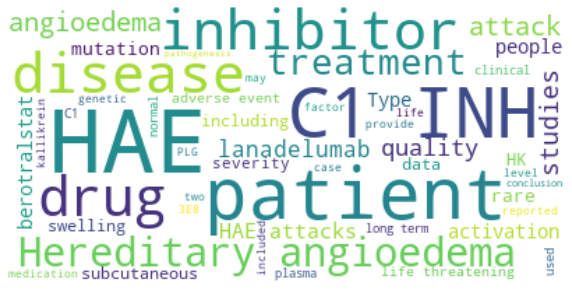

In [23]:
# join all the words into one long text
text = " ".join(review for idx, review in enumerate(df_merged.clean))

# drop stopwords - words that are common and irrelevant for themes e.g. the and in
stopwords = set(STOPWORDS)
# add movie specific stopwords that might not be that relevant for visualization
#stopwords.update(['film', 'movie', 'show', 'character', 'direct', 'watch', 'act'])

# visualize with word cloud
wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(text)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()